<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
data=pd.read_csv('/datasets/Churn.csv')
#смотрим таблицу
display(data.head(10))
print(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


<i><b>Перед нами датасет, из 10 000 строк. В столбце Tenure есть пропуски, которые надо будет обработать. Также названия столбцов лучше сменить на строчные. <br>Exited будет целевым признаком машинного обучения.</b></i>

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и данных проведены, идем дальше
</div>

<i>Преборазуем колонки к строчным буквам </i>

In [3]:
data.columns=data.columns.str.lower()
display(data.head(10))

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#Посмотрим число строк полных дубликатов
print(data.duplicated().sum()) 

0


<i>Полных дубликатов нет </i>

In [5]:
display(data.describe())

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

В колонке с целевым признакам только значения 0 и 1, нерелевантных значений нет.

<i>Обработаем пропуска в tenure</i>

In [7]:
data.isnull().mean()
data.loc[data['tenure'].isnull()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


<i>Видим, что в местах пропусков у клиентов есть какое-то число продуктов, значит на 0 NaN заменить нельзя.<br>Какой-то логики у пропусков не видно, вроде пропусков в определенной стране.</i>

In [8]:
data.loc[data['tenure'].isnull()].describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


<i>Возможно заменить пропуски средним по возрасту?<br>Посмотрим на график зависимости возраста и  Tenure</i>

<i>Посмотрим гистограмму распределенеия значений tenure </i>

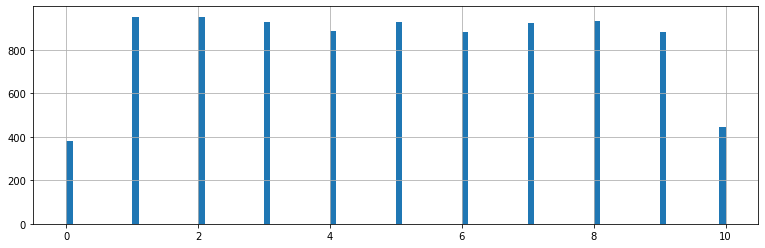

In [9]:
data['tenure'].hist(bins = 100,figsize=(13,4))

<i>Распределение похоже на нормальное </i>

<i>Посмотрим на зависимость чилса лет клиента в банке от его/ее возраста</i>

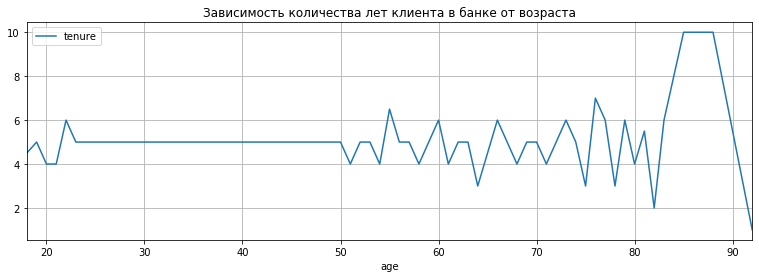

In [10]:
data_graph_tenure_Age=data.loc[data['tenure'].isnull()==False].pivot_table(index='age', values='tenure', aggfunc='median')
data_graph_tenure_Age.plot(grid = True,figsize=(13,4))
plt.title('Зависимость количества лет клиента в банке от возраста')
plt.show()

<i>Видим, что: <br>
а)На участке от 0 до 23 лет большой разброс, на участке от 50 и выше чем дальше тем больше разброс. Скорей всего у нас меньше данных по этим возрастам. Это неудивительно, так как люди старшего возраста меньше пользуются банками, и младшего тоже начиная с определенного порога.<br>
б)Медиана самых активных клиентов не меняется, поэтому не будетм дробить по возрастным категориям и просто заменим пропуски медианой.
</i>

In [11]:
print(data.loc[data['age']<23].info())
print(data.loc[data['age']>50].info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 57 to 9940
Data columns (total 14 columns):
rownumber          226 non-null int64
customerid         226 non-null int64
surname            226 non-null object
creditscore        226 non-null int64
geography          226 non-null object
gender             226 non-null object
age                226 non-null int64
tenure             211 non-null float64
balance            226 non-null float64
numofproducts      226 non-null int64
hascrcard          226 non-null int64
isactivemember     226 non-null int64
estimatedsalary    226 non-null float64
exited             226 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 26.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 16 to 9991
Data columns (total 14 columns):
rownumber          1261 non-null int64
customerid         1261 non-null int64
surname            1261 non-null object
creditscore        1261 non-null int64
geography          

<i>Так и есть, людей возрастом 'меньше 23' 226, возрастом 'старше 50' 1261, при размере датасета в 10 000 строк </i>

In [12]:
#Посмотрим медиану
tenure_median = data.loc[data['tenure'].isnull()==False,'tenure'].median()
print('Медианное число лет, сколько человек является клиентом банка:',tenure_median)

Медианное число лет, сколько человек является клиентом банка: 5.0


In [13]:
#заменим пропуски медианой
data['tenure'].fillna(tenure_median, inplace=True)
#проверим результат
data.isnull().mean()

rownumber          0.0
customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

## Исследование задачи

<i>У нас стоит задача классификации, а в столбце Gender и возомжно другх, категориальные признаки,а не численные с которыми может работать модель</i>

In [14]:
#Применим прямое кодирование ко всему датафрейму. Удалим колонку surname, так как она неинформативна.
data_ohe = pd.get_dummies(data.drop('surname', axis=1), drop_first=True)

In [15]:
#Разбиваем данные на выборки, тестовую и валидационную.
train_valid, test = train_test_split(data_ohe, test_size=0.2,random_state=12345)
train, valid = train_test_split(train_valid, test_size=0.2,random_state=12345)

features_train = train.drop(['exited','customerid','rownumber'], axis=1)
target_train = train['exited']
features_valid = valid.drop(['exited','customerid','rownumber'], axis=1)
target_valid = valid['exited']
features_test = test.drop(['exited','customerid','rownumber'], axis=1)
target_test = test['exited']
#Проверим размеры выборок
print(data.shape)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)


(10000, 14)
(6400, 11)
(6400,)
(1600, 11)
(1600,)
(2000, 11)
(2000,)


<i>Выборки подготовлены</i>

<i>Исследуем баланс классов</i>

In [16]:
#Обучим модель логиситической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roclg_regr=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_lg_regr=f1_score(target_valid, predicted_valid)
recall_lg_regr=recall_score(target_valid, predicted_valid)
precision_lg_regr=precision_score(target_valid, predicted_valid)
print('F1 score:',f1_score_lg_regr)
print('Полнота',recall_lg_regr)
print('Точность',precision_lg_regr)
print('AUC-ROC:',auc_roclg_regr)
#result_ta

F1 score: 0.08069164265129683
Полнота 0.0462046204620462
Точность 0.3181818181818182
AUC-ROC: 0.6799672257125482


In [17]:
probabilities_one_valid

array([0.30317937, 0.34883213, 0.10702686, ..., 0.19726962, 0.1824277 ,
       0.31782305])

In [18]:
print(data.loc[data['exited']==1].shape)
print(data.loc[data['exited']==0].shape)

(2037, 14)
(7963, 14)


<i>По малому значению F1 и другим параметрам, видим что классы несбалансированы.</i>

In [19]:
#Обучим модель DecisionTreeClassifier для сравнения с логистической регрессией
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_dcs_tr_cls=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_dcs_tr_cls=f1_score(target_valid, predicted_valid)
recall_dcs_tr_cls=recall_score(target_valid, predicted_valid)
precision_dcs_tr_cls=precision_score(target_valid, predicted_valid)
print('F1 score:',f1_score_dcs_tr_cls)
print('Полнота',recall_dcs_tr_cls)
print('Точность',precision_dcs_tr_cls)
print('AUC-ROC:',auc_roc_dcs_tr_cls)

F1 score: 0.48242811501597443
Полнота 0.49834983498349833
Точность 0.4674922600619195
AUC-ROC: 0.6828680555025433


In [20]:
#Попробуем случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=80)
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_rnd_frs_cls=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_rnd_frs_cls=f1_score(target_valid, predicted_valid)
recall_rnd_frs_cls=recall_score(target_valid, predicted_valid)
precision_rnd_frs_cls=precision_score(target_valid, predicted_valid)

print('F1 score:',f1_score_rnd_frs_cls)
print('Полнота',recall_rnd_frs_cls)
print('Точность',precision_rnd_frs_cls)
print('AUC-ROC:',auc_roc_rnd_frs_cls)

F1 score: 0.5645161290322581
Полнота 0.46204620462046203
Точность 0.7253886010362695
AUC-ROC: 0.8485499667931328


In [21]:
df = pd.DataFrame([[f1_score_lg_regr, recall_lg_regr,precision_lg_regr,auc_roclg_regr], [f1_score_dcs_tr_cls,recall_dcs_tr_cls,precision_dcs_tr_cls, auc_roc_dcs_tr_cls],[f1_score_rnd_frs_cls,recall_rnd_frs_cls,precision_rnd_frs_cls,auc_roc_rnd_frs_cls]], columns=['F1-score','Recall','Precision','AUC-ROC' ], index=['Lgst_regr', 'DecTrCllsfr','Rndm_Frst_Classifier'])
df


,F1-score,Recall,Precision,AUC-ROC
Lgst_regr,0.080692,0.046205,0.318182,0.679967
DecTrCllsfr,0.482428,0.498350,0.467492,0.682868
Rndm_Frst_Classifier,0.564516,0.462046,0.725389,0.848550


<i>1.Баланс класса сильно смещен в сторону ответов "0". <br>2.Логистическая регрессия очень чувствительная к сбалансированности классов и другим настройкам, в отличие от дерева решений и случайного дерева. </i>

## Борьба с дисбалансом

<i>Обучим логистическую регрессию учитывая дисбаланс классов</i>


In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.43051201671891326
Полнота 0.6798679867986799
Точность 0.3149847094801223
AUC-ROC: 0.7288741981368531


<i>Параметры сильно улучшились.Попробуем другие модели </i>

In [23]:
model = DecisionTreeClassifier(random_state=12345,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.4777594728171335
Полнота 0.47854785478547857
Точность 0.4769736842105263
AUC-ROC: 0.6779786305538804


In [24]:
#Попробуем случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=80,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)

print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.5672877846790889
Полнота 0.4521452145214521
Точность 0.7611111111111111
AUC-ROC: 0.8501199773022792


<i>Модель LogisticRegression показывает самый низкий F1 score, самый высокий у RandomForestClassifier<br>Улучшим параметры DecisionTreeClassifier и RandomForestClassifier </i>

In [25]:
best_model = None
best_result = 0
best_depth=0
for depth in range(1, 50,1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced') 
    model.fit(features_train,target_train) 
    predictions_valid  = model.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
print("F1-score")
print(best_result,'max_depth=',best_depth)    
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1-score
0.5588972431077694 max_depth= 6
AUC-ROC: 0.8225455544783468


In [26]:
best_model = None
best_result = 0
best_est = 20
best_depth=1
for depth in range(1,20):
    for est in range(20,120, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,min_samples_leaf = 2, max_depth=depth,class_weight='balanced')
        model.fit(features_train,target_train)
        predicted_valid  = model.predict(features_valid)
        result=f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth=depth
print("F1 наилучшей модели на валидационной выборке:", best_result,'est=',best_est, 'depth=',best_depth)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 наилучшей модели на валидационной выборке: 0.6237623762376238 est= 110 depth= 11
AUC-ROC: 0.8553020298174766


In [27]:
model = RandomForestClassifier(random_state = 12345, min_samples_leaf = 2)
parametrs = { 'n_estimators': range (20, 120, 10),
              'max_depth': range (1,20)}
grid = GridSearchCV(model, parametrs, cv=5, scoring = 'f1')
grid.fit(features_train, target_train)
grid.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

{'max_depth': 18, 'n_estimators': 100}

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=18, min_samples_leaf = 2,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)

print('F1 score для случайного леса по весрии Grid Search CSV:',f1_score(target_valid, predicted_valid))

F1 score для случайного леса по весрии Grid Search CSV: 0.6036363636363635


In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
model = LogisticRegression(random_state=12345,solver='liblinear') 
model.fit(features_upsampled, target_upsampled) 
predicted_valid=model.predict(features_valid) 

print("F1 score для линейной регрессии после upsample:", f1_score(target_valid, predicted_valid))
model = DecisionTreeClassifier(random_state=12345, max_depth=8,class_weight='balanced') 
model.fit(features_upsampled,target_upsampled) 
predicted_valid  = model.predict(features_valid)
print('F1 score для дерева решений после upsample:',f1_score(target_valid, predicted_valid))
model = RandomForestClassifier(random_state=12345, n_estimators=70,class_weight='balanced', max_depth=14)
model.fit(features_upsampled,target_upsampled)
predicted_valid  = model.predict(features_valid)
print('F1 score для случайного леса после upsample:',f1_score(target_valid, predicted_valid))

F1 score для линейной регрессии после upsample: 0.34398605461940734
F1 score для дерева решений после upsample: 0.5500633713561471
F1 score для случайного леса после upsample: 0.6022544283413849


<i>У каждой из моделей показатели ухудшились </i>

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=12345,solver='liblinear') 
model.fit(features_downsampled, target_downsampled) 
predicted_valid=model.predict(features_valid) 
print("F1 score для линейной регрессии после downsample:", f1_score(target_valid, predicted_valid))
model = DecisionTreeClassifier(random_state=12345, max_depth=8,class_weight='balanced') 
model.fit(features_downsampled,target_downsampled) 
predicted_valid  = model.predict(features_valid)
print('F1 score для дерева решений после downsample:',f1_score(target_valid, predicted_valid))
model = RandomForestClassifier(random_state=12345, n_estimators=70,class_weight='balanced', max_depth=14)
model.fit(features_downsampled,target_downsampled)
predicted_valid  = model.predict(features_valid)
print('F1 score для случайного леса после downsample:',f1_score(target_valid, predicted_valid))


F1 score для линейной регрессии после downsample: 0.33906071019473083
F1 score для дерева решений после downsample: 0.5076252723311547
F1 score для случайного леса после downsample: 0.45469255663430425


<i>У каждой из моделей показатели ухудшились </i>

<i>Мы достигли целевого показателя F1</i>

<i><b>1.Самый лучший результат  показало дерево решений - 0.6237 max_depth= 11, est=110
AUC-ROC: 0.85. AUC-ROC у нас гораздо больше 0.5(выдаче случайной модели), т.е. модель на адекватность уже проверена.<br> <br>2.Логистическая регрессия показала худший результат по F1 на нашей выборке, при этом еще показала себя как очень чувствительный как данным инструмент.</b></i>

## Тестирование модели

<i>Проверим модель на тестовой выборке </i>

In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=110,min_samples_leaf = 2, max_depth=11,class_weight='balanced')
model.fit(features_train,target_train)


predicted_test  = model.predict(features_test)
result_test=f1_score(target_test, predicted_test)

predicted_valid  = model.predict(features_valid)
result_valid=f1_score(target_valid, predicted_valid)        
print("F1 наилучшей модели на валидационнной выборке:", result_valid)
print("F1 наилучшей модели на тестовой выборке:", result_test)

F1 наилучшей модели на валидационнной выборке: 0.6237623762376238
F1 наилучшей модели на тестовой выборке: 0.6460071513706794


<i>На тестовой выборке результат немного выше, чем на валидационной.

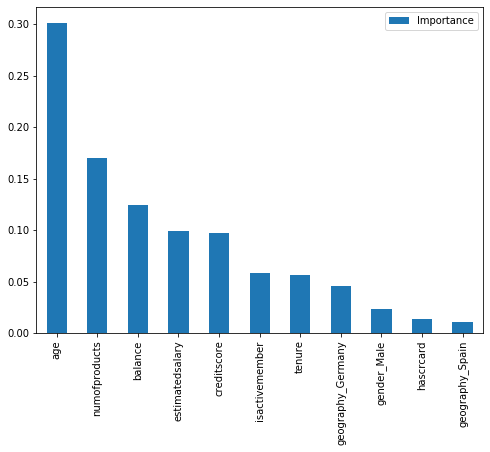

In [32]:
feat_importances = pd.DataFrame(model.feature_importances_, index=features_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

<i>Как видим из Feature_impportances_, самый важным фактором оказались возраст, число продуктов банка, банас и примерная зарплата.</i>